**Essence of ML & DL is:** Take data fron the past -> build an algo(like NN) to discover patterns in it -> Use the diacovered patterns to predict the future.

In [1]:
# Required imports
import torch
from torch import nn # nn, for Neural Networks, module contains all of PyTorch's building blocks for NNs
import matplotlib.pyplot as plt

### 1. Data (preparing and loading)

Data can be anything.

ML has two parts: 1) Turn data into numbers i.e., a representation.
                   2) Pick/build a model to learn that representation as best as possible.

Parameters are what are learned by these models.

In [2]:
# Known params
weight = 0.7
bias = 0.3

# Data
start = 0
end = 1
step = 0.02
# Turning row vectors into col vectors using unsqueeze()
X = torch.arange(start, end, step).unsqueeze(dim=1) # features (input)
y = weight * X + bias # labels (input)

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

#### Data Splitting

Typically, done right at the start of the project when dealing with real-world data. Test of Generalization of models is done by test set.

In [3]:
# Train/Test Split
train_split = int(0.8 * len(X)) # 80% data used for training set; 20% for test set
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

#### Data Visualization

In [4]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = None):
    # Plots training, testing data and compares predicitons.
    plt.figure(figsize=(10, 7))
    # train in blue
    plt.scatter(train_data, train_labels, c="b", s = 4, label = "Train")
    # test in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Test")

    if predictions is not None:
        # predictions in red
        plt.scatter(test_data, predictions, c="r", s=4, label = "Predictions")

    # Show legend
    plt.legend(prop={"size" : 4})

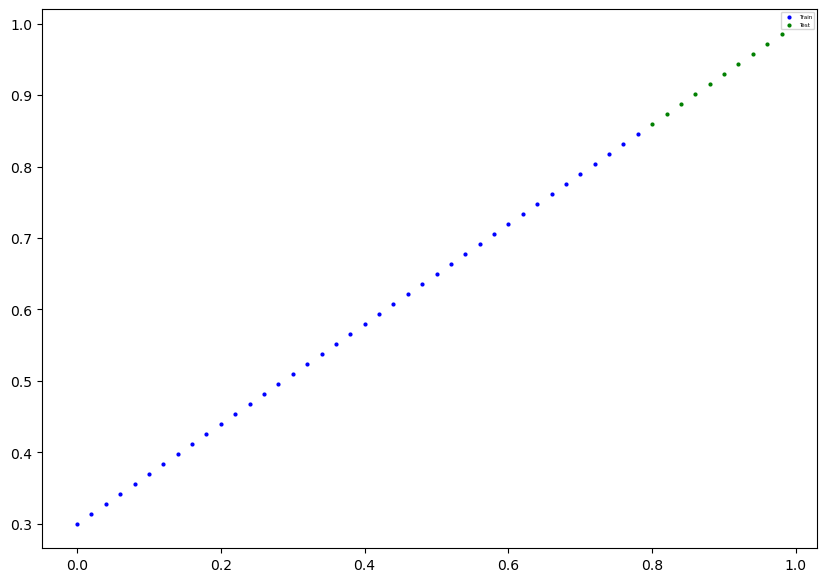

In [5]:
plot_predictions()

Visualize, Visualize, Visualize!! To understand the data better.

### 2. Build Model

Linear Regression, ex.

In [6]:
# Creating a Linear Regression model class

# Almost everything in PyTorch is a nn.Module (as a NN lego block); torch.nn.Module is the base class for all NN modules.
                                                                  # All the building blocks for NNs are subclasses.
                                # While building a NN in PyTorch, the models should subclass nn.Module.
                                # Requires a forward() method to be implemented (kinda mandatory).
class LinearRegressionModel(nn.Module): # torch.nn contains all of the building blocks for computational graphs.
    def __init__(self):
        super().__init__()
        # torch.nn.Parameter stores tensors that can be used with nn.Module; If requires_grad = True, then gradients are
                                                # calculated automatically and thus, often referred to as AUTOGRAD.
        # starts with random weights as done below
        self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True) # requires_grad means that can 
                                                                                               # we update this value with gradient descent ?
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

    # forward function defines the computation in the model (forward pass, kinda.)
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
        # Returning the linear regresssion formula (y = m*x +b)
        return self.weights * x + self.bias

#### PyTorch model building essentials

PyTorch has **four essential modules** that are used to create any kind of NN imaginable. These are as follows:

**torch.optim** contains various optimization algorithms, telling the params in nn.Parameter how to best change to improve gradient descent and in turn, reduce loss. 

For easier understanding, think of the above as follows:

nn.Module -> Has larger building blocks (layers)

nn.Parameter -> Has smaller params like wts & biases (put together to make nn.Module(s))

forward() -> Tells the larger blocks how to make calculations on inputs within nn.Module(s)  {Must override the forward method of nn.Module.}

torch.optim -> Has optimizers to improve the params within nn.Parameter to better represent input data.

#### Checking the contents pf a PyTorch Model

Creating a model instance with the class made and doing some checks.

In [7]:
torch.manual_seed(42) # Set because random initialization in nn.Parameter; reproducibility reasons.

# Instance Creation of model; a subclass of nn.Module
model_0 = LinearRegressionModel()

# Checks
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# The state (what model contains) of the model check; Listing named params using state_dict() method.
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

#### Making predictions using **torch.inference_mode()**

In [9]:
# Predictions using the model
with torch.inference_mode(): # torch.inference_mode() as a context manager
    y_preds = model_0(X_test)

# torch.inference_mode() turns off a bunch of things (gradient tracking, necessary for training but not for inference/preds) to make things faster

In [10]:
len(X_test), len(y_preds), y_preds

(10,
 10,
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

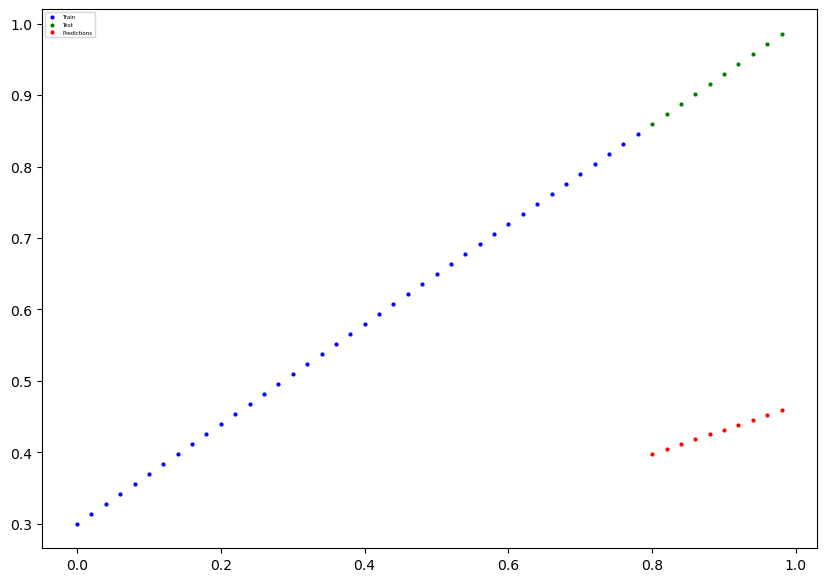

In [11]:
plot_predictions(predictions = y_preds)

In [12]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

### 3. Train Model

parameters are also referred to as patterns by the author.

#### Creating a loss function and optimizer in PyTorch

Loss function measures how wrong the model's predictions are compared to the truth labels. Lower the better. In torch.nn. Common ar MAE & Binary cross entrpy

Optimizer tells the model how to update its internal parameters to best lower the loss. In torch.optim. Common are SGD & Adam.

In [13]:
# Loss Function Creation
loss_fn = nn.L1Loss() # MAE

# Optimizer Creation
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#### Creating an optimization loop in PyTorch

It involves the creation of training and testing loops. Remember the Unofficial PyTorch Optimization song.

##### PyTorch training loop

##### PyTorch testing loop

In [14]:
# Putting it all together

torch.manual_seed(42)

# Number of times the model passes over the train data
epochs = 200

# Empty lists creationf for model progress tracking
train_losses = []
test_losses = []
epoch_count = []

for epoch in range(epochs):
    # Training
    # Model in train mode
    model_0.train()

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradient of the optimizer
    optimizer.zero_grad()

    # 4. Loss Backwards (backprop)
    loss.backward()

    # Progress the optimizer
    optimizer.step()

    # Testing
    #Model in eval mode
    model_0.eval()

    with torch.inference_mode():
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float))  #Because predicitons come in float datatype so, comparisons should be done on same tensor types

        # Print out the stats simultaneously
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_losses.append(loss.detach().numpy())
            test_losses.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

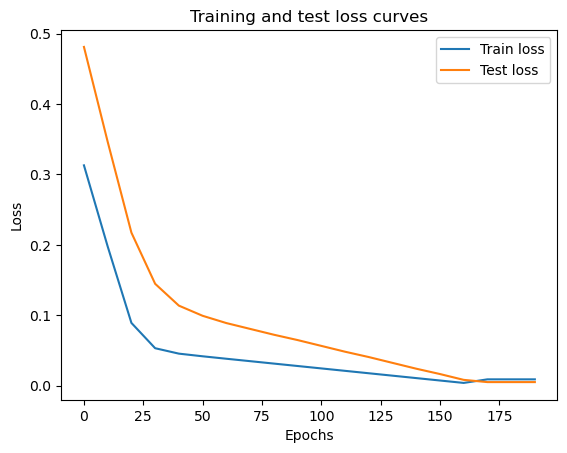

In [15]:
# Plot the loss curves
plt.plot(epoch_count, train_losses, label = "Train loss")
plt.plot(epoch_count, test_losses, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
# Find our model's learned parameters state
print("Learned params:")
print(model_0.state_dict())
print("\nOriginal params:")
print(f"weights: {weight}, bias: {bias}")

Learned params:
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

Original params:
weights: 0.7, bias: 0.3


### 4. Making predictions with a trained PyTorch model (inference)

In [17]:
# Model set in eval mode
model_0.eval()

# Set inference mode context manager
with torch.inference_mode():
    # Not device-agnostic code
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

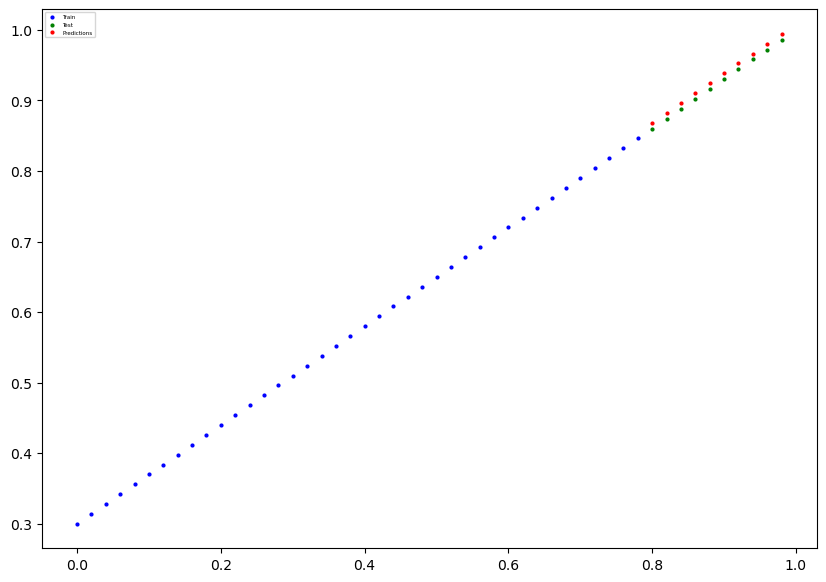

In [18]:
plot_predictions(predictions = y_preds)

### 5. Saving and loading a PyTorch model

3 main methods one should be aware of for this are as follows:

**torch.save, torch.load, torch.nn.Module.load_state_dict**

All of these use Python's pickle utility.

#### Saving a PyTorch model's state_dict()

In [19]:
from pathlib import Path

# 1. models directory creation
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. model save path creation
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Ssve the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
# only save the state_dict() containing the model's learned params
torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [20]:
# Saved file checks
!dir models

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\PyTorch-Learning\models

29-07-2025  21:03    <DIR>          .
29-07-2025  21:39    <DIR>          ..
29-07-2025  21:39             1,680 01_pytorch_workflow_model_0.pth
29-07-2025  21:39             1,744 01_pytorch_workflow_model_1.pth
29-07-2025  21:39             1,732 01_pytrch_wrkflw_model_ex.pth
               3 File(s)          5,156 bytes
               2 Dir(s)  32,405,942,272 bytes free


#### Loading a saved PyTorch model's state_dict()

In [21]:
# Instantiate a new instance of our model(will be instantiated witth random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (will update the new instance with the trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only = True))

<All keys matched successfully>

In [22]:
# Testing the loaded model
# 1. Loaded model into eval mode
loaded_model_0.eval()

# 2. Use inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [23]:
# Compare previous model's preds with the loaded model's preds (should be same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Putting it all together

In [24]:
# Setup Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")

Using cuda


#### Data

In [25]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
# Data Split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

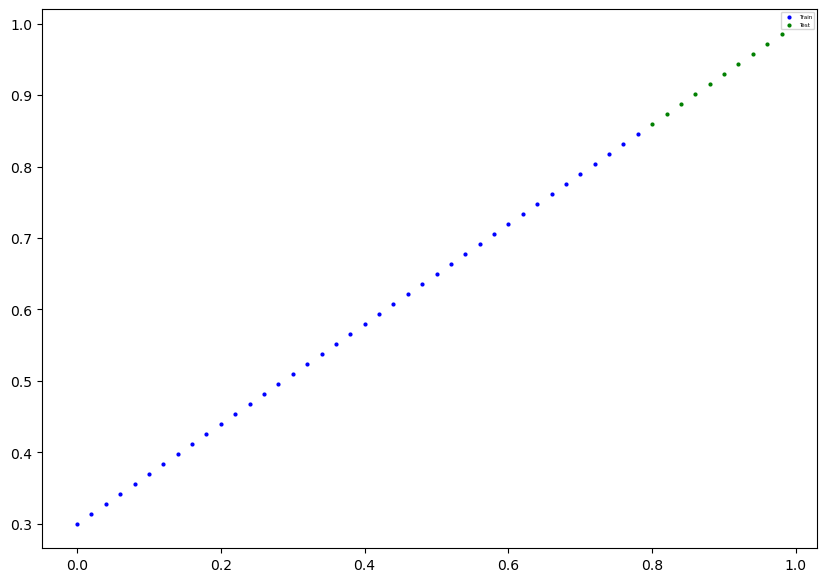

In [27]:
# Data Visualization
plot_predictions(X_train, y_train, X_test, y_test)

#### Building a PyTorch linear model

In [28]:
# Subclass nn.Module to make the Linear Regression Model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Using nn.Linear() for creating the model params
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

    # Define the forward pass (or computation)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the see value (optional)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [29]:
# Check model's current device
print(next(model_1.parameters()).device)

# Now, set the model to GPU if available.
model_1.to(device)
next(model_1.parameters()).device

cpu


device(type='cuda', index=0)

#### Training

In [30]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [31]:
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data on the GPU
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training Loop
    model_1.train()

    # Forward Pass
    y_pred = model_1(X_train)

    # Calculate Loss
    loss = loss_fn(y_pred, y_train)

    # Zero grad optimizer
    optimizer.zero_grad()

    # Loss Backward (BACKPROP)
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Testing Loop
    model_1.eval()

    # Forward Pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # Calculatee the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 100 | Train Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 200 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 300 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 400 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 500 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 600 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 700 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 800 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 900 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882


In [32]:
# Checking with the model's learned params
from pprint import pprint
print("Learned parameters")
pprint(model_1.state_dict())
print("\nOriginal hard-coded parameters")
print(f"weights: {weight}, bias: {bias}")

Learned parameters
OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Original hard-coded parameters
weights: 0.7, bias: 0.3


#### Making Predictions

In [33]:
# Set model into eval mode
model_1.eval()

# Make preds on test data
with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

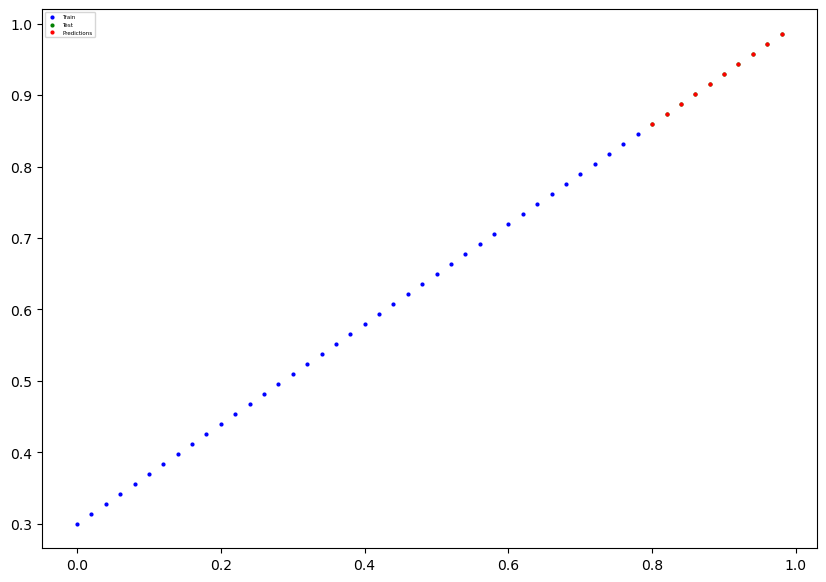

In [34]:
# Data on GPU cannot be used with libraries that work on CPU such as NumPy, Pandas and Matplotlib.
# For that to work, one has to use the .cpu() method to get a copy of the GPU tensor on the CPU.
# Thus, putting data onto CPU and plotting it
plot_predictions(predictions=y_preds.cpu())

#### Saving and loading a model

In [35]:
# models directory creation check
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# model save path creation
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# SAVE TH MODEL STATE DICT
print(f"Savd the model in: {MODEL_SAVE_PATH}")
# Saving the leaned params by the model via state_dict()
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Savd the model in: models\01_pytorch_workflow_model_1.pth


In [36]:
# Instantiate a new instance of V2
loaded_model_1 = LinearRegressionModelV2()

# Load the state_dict of the model
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only = True))

# put model to the target GPU device
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [37]:
# Evaluating the loaded model
loaded_model_1.eval()

with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

## Exercises

In [38]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [40]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples: \nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples: 
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [41]:
split_ratio = int(0.8 * len(X))
X_train = X[:split_ratio]
y_train = y[:split_ratio]
X_test = X[split_ratio:]
y_test = y[split_ratio:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [42]:
def plot_predictions(x_train_ex = X_train, y_train_ex = y_train, x_test_ex = X_test, y_test_ex = y_test, predictions = None):
    plt.figure(figsize=(10,7))
    plt.scatter(x_train_ex, y_train_ex, c="g", s=4, label = "Train data")
    plt.scatter(x_test_ex, y_test_ex, c="b", s=4, label = "Test data")

    if predictions is not None:
        plt.scatter(x_test_ex, predictions, c="r", s=4, label = "Predictions")
    plt.legend(prop = {"size" : 14})

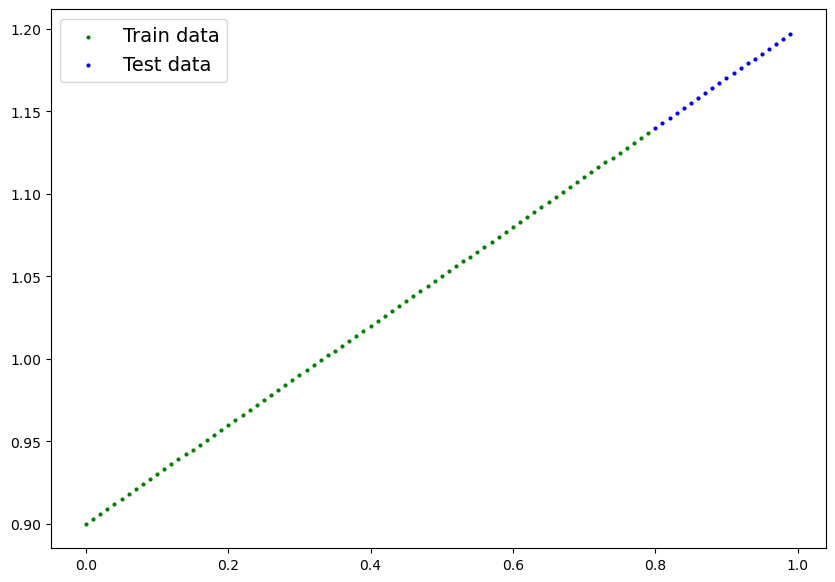

In [43]:
plot_predictions()

In [44]:
torch.manual_seed(7)
class LinearRegressionModelEX(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [45]:
model_ex = LinearRegressionModelEX()
pprint(model_ex.state_dict())
print(next(model_ex.parameters()).device)
print(model_ex.to(device))
print(next(model_ex.parameters()).device)

OrderedDict([('weights', tensor([-0.1468])), ('bias', tensor([0.7861]))])
cpu
LinearRegressionModelEX()
cuda:0


In [46]:
loss_fn_ex = nn.L1Loss()
optimizer_ex = torch.optim.SGD(params = model_ex.parameters(), lr = 0.01)

In [47]:
epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_ex.train()
    y_pred_ex = model_ex(X_train)
    loss_ex = loss_fn(y_pred_ex, y_train)
    optimizer_ex.zero_grad()
    loss_ex.backward()
    optimizer_ex.step()

    if epoch % 20 == 0:
        model_ex.eval()
        with torch.inference_mode():
            test_pred_ex = model_ex(X_test)
            test_loss_ex = loss_fn(test_pred_ex, y_test)

            print(f"Epoch: {epoch} | Train loss: {loss_ex:.3f} | Test loss: {test_loss_ex:.3f}")

Epoch: 0 | Train loss: 0.290 | Test loss: 0.500
Epoch: 20 | Train loss: 0.095 | Test loss: 0.255
Epoch: 40 | Train loss: 0.063 | Test loss: 0.160
Epoch: 60 | Train loss: 0.055 | Test loss: 0.130
Epoch: 80 | Train loss: 0.048 | Test loss: 0.113
Epoch: 100 | Train loss: 0.041 | Test loss: 0.097
Epoch: 120 | Train loss: 0.034 | Test loss: 0.080
Epoch: 140 | Train loss: 0.027 | Test loss: 0.064
Epoch: 160 | Train loss: 0.021 | Test loss: 0.048
Epoch: 180 | Train loss: 0.014 | Test loss: 0.032
Epoch: 200 | Train loss: 0.007 | Test loss: 0.015
Epoch: 220 | Train loss: 0.007 | Test loss: 0.004
Epoch: 240 | Train loss: 0.007 | Test loss: 0.004
Epoch: 260 | Train loss: 0.007 | Test loss: 0.004
Epoch: 280 | Train loss: 0.007 | Test loss: 0.004


In [48]:
print("Learned model params")
pprint(model_ex.state_dict())
print(f"Original hard-coded params-> weight: {weight}, bias: {bias}")

Learned model params
OrderedDict([('weights', tensor([0.2931], device='cuda:0')),
             ('bias', tensor([0.8961], device='cuda:0'))])
Original hard-coded params-> weight: 0.3, bias: 0.9


In [49]:
model_ex.eval()
with torch.inference_mode():
    y_preds = model_ex(X_test)
y_preds

tensor([[1.1306],
        [1.1336],
        [1.1365],
        [1.1394],
        [1.1424],
        [1.1453],
        [1.1482],
        [1.1512],
        [1.1541],
        [1.1570],
        [1.1599],
        [1.1629],
        [1.1658],
        [1.1687],
        [1.1717],
        [1.1746],
        [1.1775],
        [1.1805],
        [1.1834],
        [1.1863]], device='cuda:0')

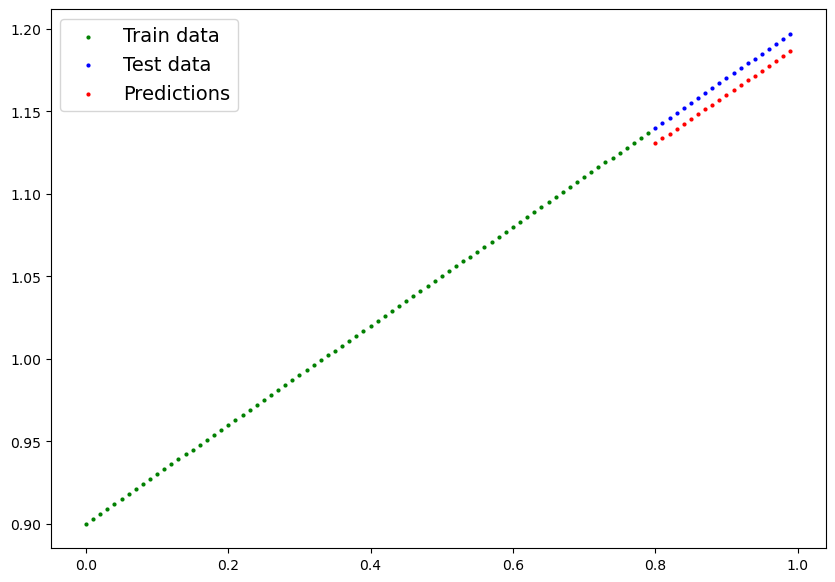

In [50]:
plot_predictions(predictions = y_preds.cpu())

In [51]:
MODEL_PATH_EX = Path("models")
MODEL_PATH_EX.mkdir(parents = True, exist_ok = True)

MODEL_NAME_EX = "01_pytrch_wrkflw_model_ex.pth"
MODEL_SAVE_PATH_EX = MODEL_PATH_EX /MODEL_NAME_EX

torch.save(obj=model_ex.state_dict(), f=MODEL_SAVE_PATH_EX)

!dir models

 Volume in drive C is Windows-SSD
 Volume Serial Number is 284D-8FBA

 Directory of C:\Users\ritis\Desktop\PyTorch-Learning\models

29-07-2025  21:03    <DIR>          .
29-07-2025  21:39    <DIR>          ..
29-07-2025  21:39             1,680 01_pytorch_workflow_model_0.pth
29-07-2025  21:39             1,744 01_pytorch_workflow_model_1.pth
29-07-2025  21:39             1,732 01_pytrch_wrkflw_model_ex.pth
               3 File(s)          5,156 bytes
               2 Dir(s)  32,405,336,064 bytes free


In [52]:
loaded_model_ex = LinearRegressionModelEX()
loaded_model_ex.load_state_dict(torch.load(MODEL_SAVE_PATH_EX, weights_only = True))
loaded_model_ex.to(device)

LinearRegressionModelEX()

In [53]:
loaded_model_ex.eval()
with torch.inference_mode():
    loaded_model_preds_ex = loaded_model_ex(X_test)

y_preds == loaded_model_preds_ex

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

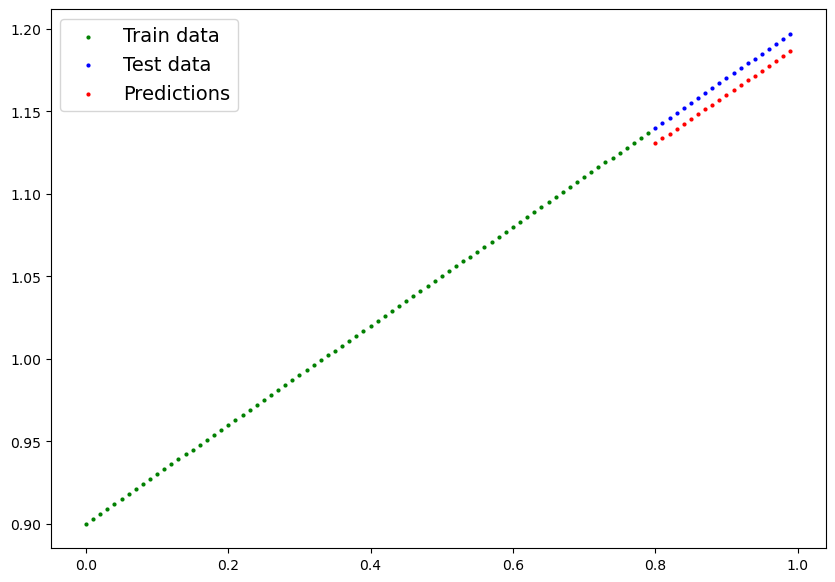

In [54]:
plot_predictions(predictions = loaded_model_preds_ex.cpu())

In [55]:
loaded_model_ex.state_dict()

OrderedDict([('weights', tensor([0.2931], device='cuda:0')),
             ('bias', tensor([0.8961], device='cuda:0'))])